In [8]:
# Import libraries required to do operations like convolution, gaussian blur, sobel operator, pixel manipulation, etc.

import matplotlib.image as mpimg 
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

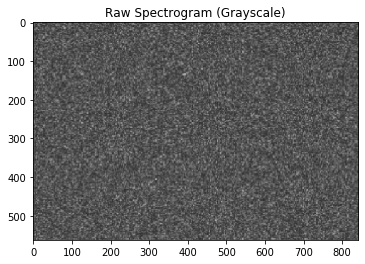

In [9]:
spec = mpimg.imread(r"\Users\Kaustav Dutta\Desktop\spectrogram.png");
plt.imshow(spec),plt.title('Raw Spectrogram (Grayscale)')
plt.show()

In [12]:
#Define a threhold. If the pixel is above threshold, mark it as 1, otherwise 0.
T=0.4

In [13]:
for i in range(1, spec.shape[0]-1):
    for j in range(1, spec.shape[1]-1):
        if (spec[i,j])[1]<T:
            spec[i,j]=0

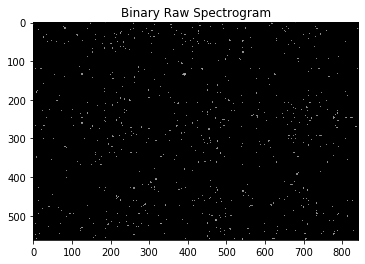

In [30]:
plt.imshow(spec),plt.title('Binary Raw Spectrogram')
plt.show()

In [10]:
concat_x=[0 for i in range(1000)]
concat_y=[0 for i in range(1000)]

Now we shall proceed with taking the pixels one by one and trying to create a line pixel.

In [ ]:
m=0 #Here m is the slope of the scanning line
for i in range(5, spec.shape[0]-5):
    for j in range(5, spec.shape[1]-5): 
        sum_max1=0
        sum_max2=0
        m_max1=0
        m_max2=0
        sum=0       
        for m in range (0,180):
            sum=0
            deg=(math.pi/180)
            if (deg>=0 and deg<=0.785398):
                for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                    if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                        sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))][1]
                        +spec[i+k,j+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                    else: 
                        sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))][1]
                                             
                    if (deg>0.785398 and deg<=1.5708):   #Here, replace i and j
                             deg=deg-0.785398               
                             for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                                if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                    sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))][1]+spec[j+k,i+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                                else: 
                                    sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))][1]
                    
                
                    if (deg>1.5708 and deg<=2.35619):  #Here, i replaced by -i, j remains same
                            deg=deg-1.5708
                            for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                                if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                    sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))][1]+spec[i+k,j+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                                    
                                else: 
                                    sum=sum+spec[i+k,j+math.floor(k*math.tan(deg))][1]     
                
                
                    if (deg>2.35619 and deg<=3.14159):  #Here, i replaced by -j, j replaced by -i
                            deg=deg-2.35619
                            for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                                if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                    sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))][1]+spec[j+k,i+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                                else: 
                                    sum=sum+spec[j+k,i+math.floor(k*math.tan(deg))][1]                            
                                             
                if sum>sum_max1:
                    sum_max1=sum
                    m_max1=m
                    for k in range(0,8):
                        concat_x[k]=i+k-4
                        concat_y[k]=j+math.floor((k-4)*math.tan((math.pi*(m_max1))/180))
        
        i_next=i+1
        j_next=j+math.floor(math.tan((math.pi*(m_max1))/180))

        points=1
        while points==1:
                        
                for m in range (0,180):
                    sum=0
                    deg=(math.pi/180)
                    if (deg>=0 and deg<=0.785398): 
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))][1]+spec[i_next+k,j_next+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                            else: 
                                   sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))][1]
                            
                            
                    if (deg>0.785398 and deg<=1.5708):   #Here, replace i and j
                        deg=deg-0.785398                
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))][1]+spec[j_next+k,i_next+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                            else: 
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))][1]
                                 
                             
                    if (deg>1.5708 and deg<=2.35619):  
                        deg=deg-1.5708
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))][1]+spec[i_next+k,j_next+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                            else: 
                                sum=sum+spec[i_next+k,j_next+math.floor(k*math.tan(deg))][1]      
                            
                        
                    if (deg>2.35619 and deg<=3.14159): 
                        deg=deg-2.35619
                        for k in range(-4,4): #We will take 4 bins on either side of the central pixel
                            if (math.floor(k*math.tan(deg))!= math.ceil(k*math.tan(deg))):
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))][1]+spec[j_next+k,i_next+math.ceil(k*math.tan(deg))][1] #Summation of pixel intensities
                            else: 
                                sum=sum+spec[j_next+k,i_next+math.floor(k*math.tan(deg))][1]       
                            
                            
                if sum>sum_max2:
                    sum_max2=sum
                    m_max2=m
                    if m_max1==m_max2:
                        for k in range(index,index+8):
                            concat_x[k]=i_next+k-4
                            concat_y[k]=j+math.floor((k-4)*math.tan((math.pi*(m_max1))/180))
                        i_next=i_next+1
                        j_next=j_next+math.tan((math.pi*(m_max1))/180)
                    else:
                        points=0
    plt.plot(concat_x, concat_y)
    concat_x=0
    concat_y=0
    